# Importações e Estruturação dos Dados

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
def insere_id(dataframe):
    dataframe.insert(0, 'ID', list(range(1,len(dataframe) +1)))

In [152]:
#As bases de dados se referem a estatísticas diferentes, entretanto se referem ao mesmo conjunto de dados com os mesmos agrupamentos
#De toda forma, um ID é inserido a cada um dos dataframes separadamente
#Feito isso, todos são unidos em um único dataframe a fim de facilitar os códigos.

df_daily_mean = pd.read_csv("..\Dados\DailyMean.csv")
df_daily_median= pd.read_csv("..\Dados\DailyMedian.csv")
df_daily_median.drop(columns=['rownumber'],inplace=True)
df_daily_min_max = pd.read_csv("..\Dados\DailyMinMax.csv")
df_base = pd.read_csv("..\Dados\Base.csv")

insere_id(df_daily_mean)
insere_id(df_daily_median)
insere_id(df_daily_min_max)

df_daily_measures = pd.merge(df_daily_mean, df_daily_median, how = 'inner', on = ['ID','TestDay','TestMonth','TestYear','ServerSite'])
df_daily_measures = pd.merge(df_daily_measures, df_daily_min_max, how = 'inner', on = ['ID','TestDay','TestMonth','TestYear','ServerSite'])

df_daily_measures.head()

,ID,TestDay,TestMonth,TestYear,DailyAverageMeanThroughputMbps,DailyAverageMinRTTDay,DailyAverageLossRate,ServerSite,date,DailyMedianMeanThroughputMbps,DailyMedianLossRate,DailyMedianMinRTTDay,DailyMinMeanThroughputMbps,DailyMinMinRTTDay,DailyMinLossRate,DailyMaxMeanThroughputMbps,DailyMaxMinRTTDay,DailyMaxLossRate
0,1,17,6,2020,1.823248,207.05400,0.012515,gru03,2020-06-17,1.823248,0.012515,207.0540,1.823248,207.054,0.012515,1.823248,207.054,0.012515
1,2,9,7,2020,32.864398,14.01550,0.010798,gru01,2020-07-09,37.681778,0.011827,14.4040,8.011241,12.000,0.004386,48.082792,15.254,0.015151
2,3,9,7,2020,41.497518,13.78860,0.080651,gru02,2020-07-09,49.890066,0.027612,14.7630,1.595871,11.024,0.008192,73.433080,16.986,0.272115
3,4,9,7,2020,57.038192,14.37450,0.050736,gru03,2020-07-09,57.038192,0.050736,14.3745,35.327219,13.086,0.025079,78.749165,15.663,0.076393
4,5,10,7,2020,50.476502,12.42425,0.007441,gru01,2020-07-10,49.660492,0.003494,12.1040,11.808759,9.946,0.000416,90.776263,15.543,0.022358


# Análise

##  Número de testes realizados ao longo do tempo 

Verificando a quantidade de medidas por dia, pode-se observar que existem alguns dias com uma quantidade incomum de acessos.

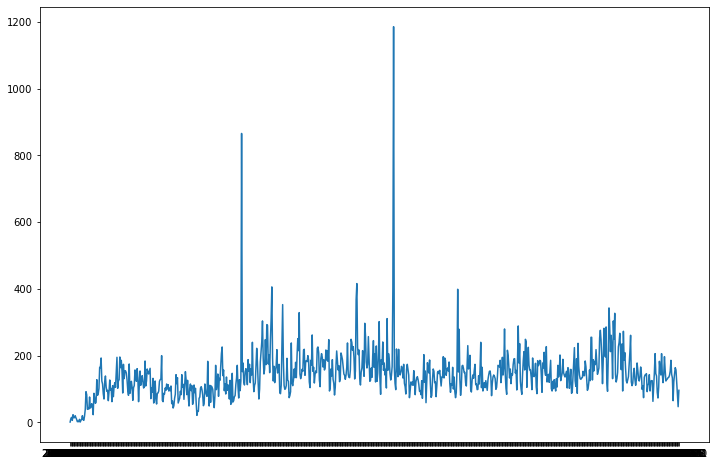

In [153]:
x = df_base.date.value_counts(sort=False).index
y = df_base.date.value_counts(sort=False)

plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.show()
plt.close()

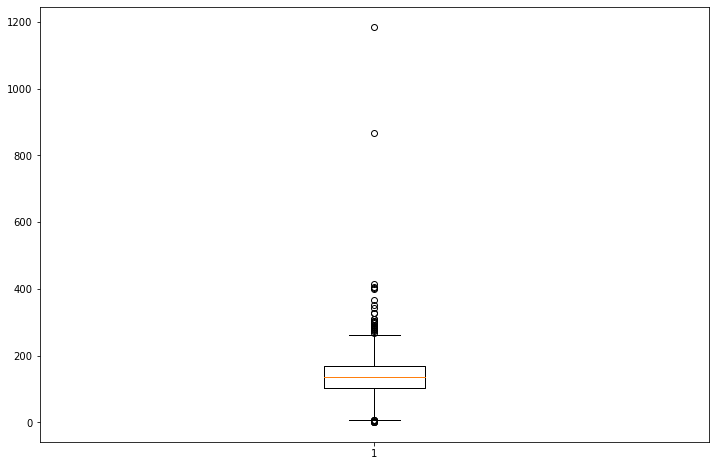

In [154]:
plt.figure(figsize=(12,8))
plt.boxplot(y)
plt.show()
plt.close()

Observando no gráfico vemos dois dias com acessos muito maiores que os outros, sabendo disso pode-se verificar quais dias são esses e o quanto são maiores que os outros.

Dias: 2021-09-30 e 2021-03-03 com 1186 e 866 medidas realizadas.

In [155]:
df_base.date.value_counts()

2021-09-30    1186
2021-03-03     866
2021-08-10     416
2021-04-14     406
2021-09-29     404
              ... 
2020-07-19       3
2020-07-18       2
2020-07-20       2
2020-07-22       1
2020-06-17       1
Name: date, Length: 846, dtype: int64

Sem esses dois outliers, pode-se observar que houve uma tendência ao aumento de medidas e ainda assim existem dias com muito mais acessos que outros

In [160]:
outliers = ['2021-09-30','2021-03-03']
sem_outliers_acesso = df_base
for linha in sem_outliers_acesso:
    print(linha)
    # linha['date'] in outliers
    # sem_outliers_acesso.drop(linha)

y = sem_outliers_acesso.date.value_counts(sort=False)
x = y.index

plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.show()
plt.close()

TypeError: string indices must be integers